# Загрузка библиотек

In [ ]:
!pip install tensorflow==1

ERROR: Could not find a version that satisfies the requirement tensorflow==1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==1


In [ ]:
import zipfile
import os
# from sklearn.model_selection import train_test_split
import shutil
import random
from PIL import Image
from collections import defaultdict # для подсчета изображений


# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as keras

# import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout


# Загрузка и подготовка данных

In [ ]:
from google.colab import drive

# Монтирование Google Диска
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Путь к архиву с изображениями
zip_path = '/content/drive/MyDrive/glasses_3class.zip'

# Папка, в которую будут распакованы изображения
extract_path = 'glasses_images'

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Проверка содержимого папки с распакованными изображениями
image_folders = os.listdir(extract_path)
print(image_folders)

['Леска', 'Ободки', 'Втулки']


In [ ]:
# Путь к папке с изображениями
folder_path = "glasses_images"

# Список подпапок
subfolders = ["Втулки", "Леска", "Ободки"]

# Создание папок для train и val выборок
train_folder = "train_folder"
val_folder = "val_folder"
test_folder = "test_folder"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Проход по каждой подпапке, разделение на train, val и test выборки
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    image_files = os.listdir(subfolder_path)
    num_images = len(image_files)
    num_train = int(0.8 * num_images)  # Количество изображений для train
    pre_num_val = num_images - num_train
    num_val = int(0.7 * pre_num_val)      # Количество изображений для val
    num_test = pre_num_val - num_val      # Количество изображений для test
    print(f"Папка {subfolder} содержит {num_images} изображений")

    # Перемешивание изображений
    random.shuffle(image_files)

    # Разделение изображений на train, val и test
    train_images = image_files[:num_train]
    pre_val_images = image_files[num_train:]
    val_images = pre_val_images[:num_val]
    test_images = pre_val_images[num_val:]

    # Создание папок train, val и test для текущей подпапки, если они не существуют
    train_subfolder_path = os.path.join(train_folder, subfolder)
    val_subfolder_path = os.path.join(val_folder, subfolder)
    test_subfolder_path = os.path.join(test_folder, subfolder)
    os.makedirs(train_subfolder_path, exist_ok=True)
    os.makedirs(val_subfolder_path, exist_ok=True)
    os.makedirs(test_subfolder_path, exist_ok=True)

    # Копирование изображений в папки train, val и test
    for image_file in train_images:
        source_path = os.path.join(subfolder_path, image_file)
        destination_path = os.path.join(train_subfolder_path, image_file)
        shutil.copyfile(source_path, destination_path)

    for image_file in val_images:
        source_path = os.path.join(subfolder_path, image_file)
        destination_path = os.path.join(val_subfolder_path, image_file)
        shutil.copyfile(source_path, destination_path)

    for image_file in test_images:
        source_path = os.path.join(subfolder_path, image_file)
        destination_path = os.path.join(test_subfolder_path, image_file)
        shutil.copyfile(source_path, destination_path)

print("Разделение на выборки завершено.")


Папка Втулки содержит 397 изображений
Папка Леска содержит 480 изображений
Папка Ободки содержит 498 изображений
Разделение на выборки завершено.


Узнаем размеры изображений

In [ ]:
# Получение размеров изображений
extract_path = '/content'
split_folders = ['train_folder', 'val_folder', 'test_folder']
class_names = ['Втулки', 'Леска', 'Ободки']

# Словарь для подсчета количества изображений по форматам
image_counts = defaultdict(int)

# Подсчет количества изображений по размерам
for split_folder in split_folders:
    for class_name in class_names:
        folder_path = os.path.join(extract_path, split_folder, class_name)
        image_files = os.listdir(folder_path)
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                image_size = img.size
                image_counts[image_size] += 1

# Вывод результатов подсчета
for size, count in image_counts.items():
    print(f"Размер: {size}, Количество изображений: {count}")

Размер: (675, 450), Количество изображений: 693
Размер: (3775, 2831), Количество изображений: 20
Размер: (2876, 2157), Количество изображений: 1
Размер: (3575, 2681), Количество изображений: 26
Размер: (900, 600), Количество изображений: 340
Размер: (3564, 2673), Количество изображений: 6
Размер: (3089, 2317), Количество изображений: 2
Размер: (4352, 3264), Количество изображений: 6
Размер: (899, 599), Количество изображений: 1
Размер: (3519, 2639), Количество изображений: 5
Размер: (889, 593), Количество изображений: 3
Размер: (3587, 2690), Количество изображений: 4
Размер: (3340, 2505), Количество изображений: 13
Размер: (2988, 2241), Количество изображений: 10
Размер: (3032, 2274), Количество изображений: 4
Размер: (3484, 2613), Количество изображений: 16
Размер: (3231, 2423), Количество изображений: 2
Размер: (879, 587), Количество изображений: 2
Размер: (2824, 2118), Количество изображений: 12
Размер: (2964, 2223), Количество изображений: 1
Размер: (3027, 2270), Количество изображ

In [ ]:
# посмотрим на самый минимальный размер изображения

min_size = min(image_counts.keys())

# Вывести самый минимальный размер и количество изображений с этим размером
print(f"Самый минимальный размер: {min_size}, Количество изображений: {image_counts[min_size]}")


Самый минимальный размер: (648, 450), Количество изображений: 2


## Подготовим данные для подачи в AutoKeras, задавая размер изображений

In [ ]:
# Список категорий
categories = ['Втулки', 'Леска', 'Ободки']

# Размер изображений (предположим, что все изображения имеют одинаковый размер)
# image_size = (640, 448)
# image_size = (84, 112)    # уменьшим размер изображения, для оперативного обучения
image_size = (128, 128)


# Создание пустых списков для x_train и y_train
x_train = []
y_train = []

# Проход по категориям
for category_id, category in enumerate(categories):
    category_path = os.path.join(train_folder, category)

    # Проход по файлам в каждой категории
    for filename in os.listdir(category_path):
        image_path = os.path.join(category_path, filename)

        # Загрузка изображения с помощью OpenCV
        image = cv2.imread(image_path)

        # Изменение размера изображения
        image = cv2.resize(image, image_size)

        # Преобразуем изображение в ч/б цвет
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Добавление изображения в x_train
        x_train.append(image)

        # Добавление метки в y_train
        y_train.append(category_id)

# Преобразование списков в массивы NumPy
x_train = np.array(x_train)
y_train = np.array(y_train)

# Преобразование меток в one-hot кодирование с помощью to_categorical
y_train = to_categorical(y_train, num_classes=3)

# Вывод размеров x_train и y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1099, 128, 128, 3)
y_train shape: (1099, 3)


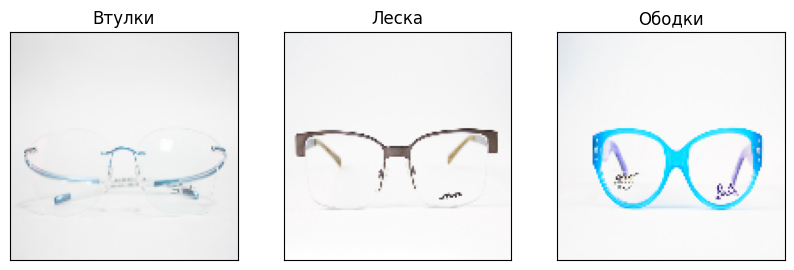

In [ ]:
class_names = ['Втулки', 'Леска', 'Ободки']

fig = plt.figure(figsize=(10,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1 + i, xticks=[], yticks=[])
    idx = np.where(np.argmax(y_train, axis=-1) == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Размер изображений (предположим, что все изображения имеют одинаковый размер)
# image_size = (640, 448)
# image_size = (84, 112)    # уменьшим размер изображения, для оперативного обучения
image_size = (128, 128)

# Создание пустых списков для x_val и y_val
x_val = []
y_val = []

# Проход по категориям
for category_id, category in enumerate(categories):
    category_path = os.path.join(val_folder, category)

    # Проход по файлам в каждой категории
    for filename in os.listdir(category_path):
        image_path = os.path.join(category_path, filename)

        # Загрузка изображения с помощью OpenCV
        image = cv2.imread(image_path)

        # Изменение размера изображения
        image = cv2.resize(image, image_size)

        # Преобразуем изображение в ч/б цвет
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Добавление изображения в x_val
        x_val.append(image)

        # Добавление метки в y_val
        y_val.append(category_id)

# Преобразование списков в массивы NumPy
x_val = np.array(x_val)
y_val = np.array(y_val)

# Преобразование меток в one-hot кодирование с помощью to_categorical
y_val = to_categorical(y_val, num_classes=3)

# Вывод размеров x_val и y_val
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_val shape: (193, 128, 128, 3)
y_val shape: (193, 3)


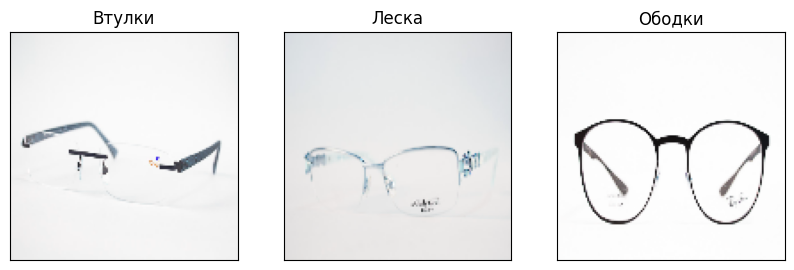

In [ ]:
class_names = ['Втулки', 'Леска', 'Ободки']

fig = plt.figure(figsize=(10,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1 + i, xticks=[], yticks=[])
    idx = np.where(np.argmax(y_val, axis=-1) == i)[0]
    features_idx = x_val[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Размер изображений (предположим, что все изображения имеют одинаковый размер)
# image_size = (640, 448)
# image_size = (84, 112)    # уменьшим размер изображения, для оперативного обучения
image_size = (128, 128)

# Создание пустых списков для x_val и y_val
x_test = []
y_test = []

# Проход по категориям
for category_id, category in enumerate(categories):
    category_path = os.path.join(test_folder, category)

    # Проход по файлам в каждой категории
    for filename in os.listdir(category_path):
        image_path = os.path.join(category_path, filename)

        # Загрузка изображения с помощью OpenCV
        image = cv2.imread(image_path)

        # Изменение размера изображения
        image = cv2.resize(image, image_size)

        # Преобразуем изображение в ч/б цвет
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Добавление изображения в x_val
        x_test.append(image)

        # Добавление метки в y_val
        y_test.append(category_id)

# Преобразование списков в массивы NumPy
x_test = np.array(x_test)
y_test = np.array(y_test)

# Преобразование меток в one-hot кодирование с помощью to_categorical
y_test = to_categorical(y_test, num_classes=3)

# Вывод размеров x_val и y_val
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (83, 128, 128, 3)
y_test shape: (83, 3)


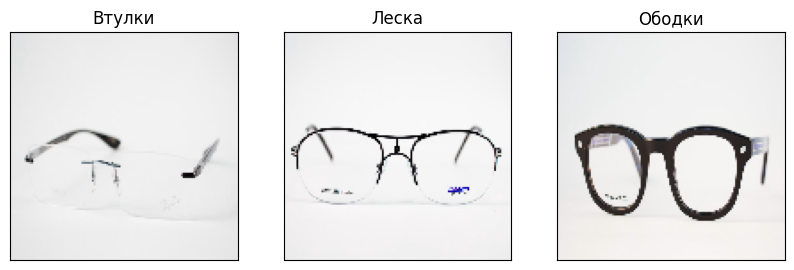

In [ ]:
class_names = ['Втулки', 'Леска', 'Ободки']

fig = plt.figure(figsize=(10,10))
for i in range(3):
    ax = fig.add_subplot(1, 3, 1 + i, xticks=[], yticks=[])
    idx = np.where(np.argmax(y_test, axis=-1) == i)[0]
    features_idx = x_test[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Нормализация данных
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Проверка размерностей массивов
print("Размерности массивов:")
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Размерности массивов:
x_train: (1099, 128, 128, 3)
x_val: (193, 128, 128, 3)
x_test: (83, 128, 128, 3)
y_train: (1099, 3)
y_val: (193, 3)
y_test: (83, 3)


In [ ]:
input_shape = x_train.shape[1:]
input_shape

(128, 128, 3)

# Генетические алгоритмы

In [ ]:
# Функция создания случайного бота (гиперпараметров нейронной сети)
def create_bot(input_shape):
    bot = {
        "num_conv_layers": random.randint(1, 5),
        "num_filters": random.randint(32, 128),
        "kernel_size": random.randint(3, 5),
        "activation_function": random.choice(['linear', 'relu', 'sigmoid', 'gelu', 'selu', 'tanh']),
        "num_dense_units": random.randint(16, 128),
        "batch_size": random.choice([8, 64]),
    }
    return bot

# Функция создания популяции ботов
def create_population(size):
    return [create_bot(input_shape=x_train.shape[1:]) for _ in range(size)]

# Функция построения модели на основе гиперпараметров бота
def build_model(bot, input_shape):
    #model = keras.models.Sequential()  # Создаем последовательную модель
    model = Sequential()  # Создаем последовательную модель
    current_shape = input_shape   # Текущая форма входного изображения
    for i in range(bot["num_conv_layers"]):  # Цикл по сверточным слоям
        num_filters = bot["num_filters"]
        kernel_size = bot["kernel_size"]
        activation = bot["activation_function"]

        # Обновляем форму после применения сверточного слоя
        new_shape = (current_shape[0] - kernel_size + 1, current_shape[1] - kernel_size + 1, num_filters)

        # Если новая форма корректна
        if new_shape[0] > 0 and new_shape[1] > 0:
            if i == 0:  # Если это первый слой
                model.add(Conv2D(num_filters, kernel_size=kernel_size, activation=activation, input_shape=input_shape))
            else:
                model.add(Conv2D(num_filters, kernel_size=kernel_size, activation=activation))

            current_shape = new_shape
            # Если после свертки остается достаточно пространства для пулинга
            if current_shape[0] > 1 and current_shape[1] > 1:
                model.add(MaxPooling2D(pool_size=(2, 2)))  # Добавляем слой max-pooling
                current_shape = (current_shape[0] // 2, current_shape[1] // 2, num_filters)

    # Выравниваем данные перед полносвязными слоями
    model.add(Flatten())
    model.add(Dense(bot["num_dense_units"], activation=bot["activation_function"]))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    return model

In [ ]:
# Функция оценки бота на основе его гиперпараметров
def evaluate_bot(bot):
    model = build_model(bot, x_train.shape[1:])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Обучаем модель на обучающей выборке
    model.fit(x_train, y_train, epochs=5, batch_size=bot["batch_size"], validation_data=(x_val, y_val), verbose=1)
    # Оцениваем модель на валидационной выборке и получаем значение точности
    score = model.evaluate(x_val, y_val, verbose=1)[1]
    # Возвращаем точность модели
    return score

# Функция "скрещивания" двух родительских ботов и создания потомка с возможными мутациями
def breed(parent1, parent2):
    child = {}    # Создаем пустой словарь для потомка
    mutation_rate = 0.1  # Задаем коэффициент мутации

    # Перебираем все параметры родителей
    for param in parent1.keys():
      # Случайным образом выбираем значения параметра от одного из родителей
        child[param] = random.choice([parent1[param], parent2[param]])

        # Применение мутации
        if random.random() < mutation_rate:
            if param == 'num_conv_layers':
                child[param] = random.randint(1, 5)
            elif param == 'num_filters':
                child[param] = random.choice([16, 32, 64, 128])
            elif param == 'kernel_size':
                child[param] = random.choice([3, 5])
            elif param == 'activation_function':
                child[param] = random.choice(['linear', 'relu', 'sigmoid', 'gelu', 'selu', 'tanh'])
            elif param == 'num_dense_units':
                child[param] = random.choice([16, 128])
            elif param == 'batch_size':
                child[param] = random.choice([8, 64])
    return child

### Запуск 1
best score = 0.943 на 5 эпохах

In [ ]:
# Задаем размер популяции
population_size = 4
# Задаем число поколений генетики
num_generations = 2
# Создаем начальную популяцию
population = create_population(population_size)
# Инициализация списков для хранения лучших и средних точностей на каждом поколении
best_accuracy_list = []
average_accuracy_list = []

# Цикл по поколениям
for generation in range(num_generations):
    scores = [evaluate_bot(bot) for bot in population] # Оцениваем каждого бота в популяции
    best_accuracy = max(scores)           # Находим лучшую точность
    average_accuracy = np.mean(scores)    # Находим среднюю точность

    # Добавляем лучшую и среднюю точности в соответствующие списки
    best_accuracy_list.append(best_accuracy)
    average_accuracy_list.append(average_accuracy)

    print(f"Generation {generation+1}: Best accuracy: {best_accuracy}, Average accuracy: {average_accuracy}")

    sorted_indices = np.argsort(scores)[::-1]  # Индексы сортированных ботов по убыванию точности
    population = [population[i] for i in sorted_indices[:population_size // 2]]  # Отбор половины лучших ботов
     # Скрещивание лучших ботов и добавление потомков в популяцию
    for _ in range(population_size // 2):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = breed(parent1, parent2)
        population.append(child)

# Оценка и выбор лучшего бота из популяции
best_bot = max(population, key=lambda bot: evaluate_bot(bot))
best_score = evaluate_bot(best_bot)

print(f"Best bot: {best_bot}")
print(f"Best score: {best_score}")

Epoch 1/5
18/18 [==============================] - 13s 90ms/step - loss: 1.3949 - accuracy: 0.3549 - val_loss: 1.2835 - val_accuracy: 0.3627
Epoch 2/5
18/18 [==============================] - 1s 69ms/step - loss: 1.3407 - accuracy: 0.3512 - val_loss: 1.2376 - val_accuracy: 0.3627
Epoch 3/5
18/18 [==============================] - 1s 69ms/step - loss: 1.2927 - accuracy: 0.3740 - val_loss: 1.1968 - val_accuracy: 0.3627
Epoch 4/5
18/18 [==============================] - 1s 65ms/step - loss: 1.2643 - accuracy: 0.3439 - val_loss: 1.1664 - val_accuracy: 0.3627
Epoch 5/5
7/7 [==============================] - 0s 13ms/step - loss: 1.1430 - accuracy: 0.3627
Epoch 1/5
69/69 [==============================] - 7s 51ms/step - loss: 0.9270 - accuracy: 0.5350 - val_loss: 0.6685 - val_accuracy: 0.7927
Epoch 2/5
69/69 [==============================] - 3s 36ms/step - loss: 0.5987 - accuracy: 0.7507 - val_loss: 0.4086 - val_accuracy: 0.8653
Epoch 3/5
69/69 [==============================] - 3s 36ms/step

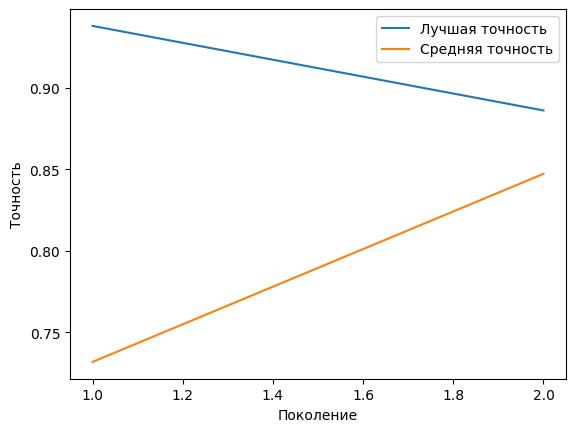

Лучший бот: {'num_conv_layers': 3, 'num_filters': 123, 'kernel_size': 4, 'activation_function': 'relu', 'num_dense_units': 52, 'batch_size': 16}
Лучшая точность: 0.9430052042007446


In [ ]:
# Построение графика
generations = range(1, num_generations + 1)
plt.plot(generations, best_accuracy_list, label="Лучшая точность")
plt.plot(generations, average_accuracy_list, label="Средняя точность")
plt.xlabel("Поколение")
plt.ylabel("Точность")
plt.legend()
plt.show()


print(f"Лучший бот: {best_bot}")
print(f"Лучшая точность: {best_score}")

### Запуск 2
best score = 0,91  на 10 эпохах

При этом есть точность 0,943, но почему-то этот результат не отразился как лучший

In [ ]:
# Задаем размер популяции
population_size = 4
# Задаем число поколений генетики
num_generations = 2
# Создаем начальную популяцию
population = create_population(population_size)
# Инициализация списков для хранения лучших и средних точностей на каждом поколении
best_accuracy_list = []
average_accuracy_list = []

# Цикл по поколениям
for generation in range(num_generations):
    scores = [evaluate_bot(bot) for bot in population] # Оцениваем каждого бота в популяции
    best_accuracy = max(scores)           # Находим лучшую точность
    average_accuracy = np.mean(scores)    # Находим среднюю точность

    # Добавляем лучшую и среднюю точности в соответствующие списки
    best_accuracy_list.append(best_accuracy)
    average_accuracy_list.append(average_accuracy)

    print(f"Generation {generation+1}: Best accuracy: {best_accuracy}, Average accuracy: {average_accuracy}")

    sorted_indices = np.argsort(scores)[::-1]  # Индексы сортированных ботов по убыванию точности
    population = [population[i] for i in sorted_indices[:population_size // 2]]  # Отбор половины лучших ботов
     # Скрещивание лучших ботов и добавление потомков в популяцию
    for _ in range(population_size // 2):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = breed(parent1, parent2)
        population.append(child)

# Оценка и выбор лучшего бота из популяции
best_bot = max(population, key=lambda bot: evaluate_bot(bot))
best_score = evaluate_bot(best_bot)

print(f"Best bot: {best_bot}")
print(f"Best score: {best_score}")

Epoch 1/10
69/69 [==============================] - 6s 42ms/step - loss: 1.0758 - accuracy: 0.4058 - val_loss: 0.9823 - val_accuracy: 0.4404
Epoch 2/10
69/69 [==============================] - 2s 27ms/step - loss: 0.8147 - accuracy: 0.5978 - val_loss: 0.6671 - val_accuracy: 0.7565
Epoch 3/10
69/69 [==============================] - 2s 27ms/step - loss: 0.6194 - accuracy: 0.7425 - val_loss: 0.4821 - val_accuracy: 0.8031
Epoch 4/10
69/69 [==============================] - 2s 35ms/step - loss: 0.5079 - accuracy: 0.8135 - val_loss: 0.3358 - val_accuracy: 0.8497
Epoch 5/10
69/69 [==============================] - 3s 36ms/step - loss: 0.4234 - accuracy: 0.8289 - val_loss: 0.5029 - val_accuracy: 0.7824
Epoch 6/10
69/69 [==============================] - 2s 30ms/step - loss: 0.3925 - accuracy: 0.8389 - val_loss: 0.2619 - val_accuracy: 0.9171
Epoch 7/10
69/69 [==============================] - 2s 28ms/step - loss: 0.2818 - accuracy: 0.8972 - val_loss: 0.2413 - val_accuracy: 0.9171
Epoch 8/10
69

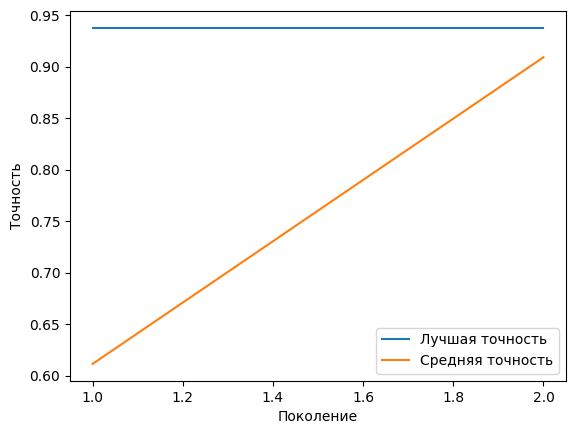

Лучший бот: {'num_conv_layers': 3, 'num_filters': 112, 'kernel_size': 5, 'activation_function': 'relu', 'num_dense_units': 34, 'batch_size': 16}
Лучшая точность: 0.9119170904159546


In [ ]:
# Построение графика
generations = range(1, num_generations + 1)
plt.plot(generations, best_accuracy_list, label="Лучшая точность")
plt.plot(generations, average_accuracy_list, label="Средняя точность")
plt.xlabel("Поколение")
plt.ylabel("Точность")
plt.legend()
plt.show()


print(f"Лучший бот: {best_bot}")
print(f"Лучшая точность: {best_score}")

### Запуск 3  (добавлены 3 активационные функции и количество сверточных слоев варьируются от 1 до 5)

best_score = 0,82

In [ ]:
# Задаем размер популяции
population_size = 4
# Задаем число поколений генетики
num_generations = 2
# Создаем начальную популяцию
population = create_population(population_size)
# Инициализация списков для хранения лучших и средних точностей на каждом поколении
best_accuracy_list = []
average_accuracy_list = []

# Цикл по поколениям
for generation in range(num_generations):
    scores = [evaluate_bot(bot) for bot in population] # Оцениваем каждого бота в популяции
    best_accuracy = max(scores)           # Находим лучшую точность
    average_accuracy = np.mean(scores)    # Находим среднюю точность

    # Добавляем лучшую и среднюю точности в соответствующие списки
    best_accuracy_list.append(best_accuracy)
    average_accuracy_list.append(average_accuracy)

    print(f"Generation {generation+1}: Best accuracy: {best_accuracy}, Average accuracy: {average_accuracy}")

    sorted_indices = np.argsort(scores)[::-1]  # Индексы сортированных ботов по убыванию точности
    population = [population[i] for i in sorted_indices[:population_size // 2]]  # Отбор половины лучших ботов
     # Скрещивание лучших ботов и добавление потомков в популяцию
    for _ in range(population_size // 2):
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = breed(parent1, parent2)
        population.append(child)

# Оценка и выбор лучшего бота из популяции
best_bot = max(population, key=lambda bot: evaluate_bot(bot))
best_score = evaluate_bot(best_bot)

print(f"Best bot: {best_bot}")
print(f"Best score: {best_score}")

Epoch 1/5
138/138 [==============================] - 7s 33ms/step - loss: 2.7568 - accuracy: 0.3376 - val_loss: 1.0972 - val_accuracy: 0.3472
Epoch 2/5
138/138 [==============================] - 4s 28ms/step - loss: 1.0966 - accuracy: 0.3394 - val_loss: 1.0959 - val_accuracy: 0.3627
Epoch 3/5
138/138 [==============================] - 4s 28ms/step - loss: 1.0956 - accuracy: 0.3621 - val_loss: 1.0952 - val_accuracy: 0.3627
Epoch 4/5
138/138 [==============================] - 4s 29ms/step - loss: 1.0950 - accuracy: 0.3621 - val_loss: 1.0947 - val_accuracy: 0.3627
Epoch 5/5
7/7 [==============================] - 0s 24ms/step - loss: 1.0945 - accuracy: 0.3627
Epoch 1/5
138/138 [==============================] - 5s 23ms/step - loss: 12.0742 - accuracy: 0.3221 - val_loss: 1.1218 - val_accuracy: 0.3472
Epoch 2/5
138/138 [==============================] - 3s 19ms/step - loss: 2.3491 - accuracy: 0.3403 - val_loss: 1.1140 - val_accuracy: 0.3472
Epoch 3/5
138/138 [==============================] 

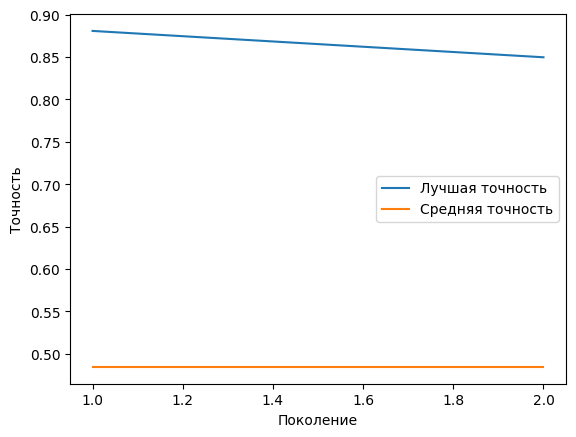

Лучший бот: {'num_conv_layers': 3, 'num_filters': 127, 'kernel_size': 3, 'activation_function': 'relu', 'num_dense_units': 86, 'batch_size': 64}
Лучшая точность: 0.8238341808319092


In [ ]:
# Построение графика
generations = range(1, num_generations + 1)
plt.plot(generations, best_accuracy_list, label="Лучшая точность")
plt.plot(generations, average_accuracy_list, label="Средняя точность")
plt.xlabel("Поколение")
plt.ylabel("Точность")
plt.legend()
plt.show()


print(f"Лучший бот: {best_bot}")
print(f"Лучшая точность: {best_score}")